# Part I - (PROSPER LOAN DATASET)
## by (EGBEAHIE, WHITNEY EHILUONAMHEN)

## Introduction

This Dataset is a Prosper Loan Data, It entails 113,937 rows and 81 columns. It shows different loan request by customers of different works of life with occupations such as; professionals, skilled labor, food services, laborers and other types of occupations. Differents insights would be derived from the Prosper Loan Datasets.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.head(5))

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...         

In [4]:
# check for null values and datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# check for duplicate 
sum(loan.duplicated())

0

In [6]:
# checking for missing records
loan.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [7]:
# change datatypes 
loan['ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])
loan['ClosedDate'] = pd.to_datetime(loan['ClosedDate'])

In [8]:
loan.dtypes

ListingKey                                     object
ListingNumber                                   int64
ListingCreationDate                    datetime64[ns]
CreditGrade                                    object
Term                                            int64
LoanStatus                                     object
ClosedDate                             datetime64[ns]
BorrowerAPR                                   float64
BorrowerRate                                  float64
LenderYield                                   float64
EstimatedEffectiveYield                       float64
EstimatedLoss                                 float64
EstimatedReturn                               float64
ProsperRating (numeric)                       float64
ProsperRating (Alpha)                          object
ProsperScore                                  float64
ListingCategory (numeric)                       int64
BorrowerState                                  object
Occupation                  

In [9]:
# copying the loan dataframe into a new variable
loan_clean = loan.copy()

In [10]:
loan_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [11]:
# drop columns from the clean dataframe 
cols_to_drop = ['ListingKey','CreditGrade', 'ClosedDate', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'GroupKey', 'DateCreditPulled',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper','OpenRevolvingAccounts',
                'OpenRevolvingMonthlyPayment','CurrentDelinquencies', 'AmountDelinquent',
                'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'AvailableBankcardCredit',
                'TradesOpenedLast6Months','DebtToIncomeRatio', 'LoanKey','TotalProsperLoans', 'TotalProsperPaymentsBilled',
                'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate', 
                'ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
                'LoanMonthsSinceOrigination', 'LoanNumber', 'MemberKey','LP_CustomerPayments','LP_CustomerPrincipalPayments', 
                'LP_InterestandFees','LP_GrossPrincipalLoss']

In [12]:
loan_clean.drop(columns=cols_to_drop, axis=1, inplace=True)
loan_clean.head(5)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,330.43,-133.18,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,318.93,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,123.32,-24.20,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,321.45,-108.01,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,563.97,-60.27,0.0,0.0,0.0,1.0,0,0,0.0,20


In [13]:
loan_clean.columns

Index(['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries',
       'RevolvingCreditBalance', 'BankcardUtilization', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment',
       'LP_ServiceFees', 'LP_CollectionFees', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',


In [14]:
# check for null values and datatypes in the new dataframe
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 45 columns):
ListingNumber                         113937 non-null int64
ListingCreationDate                   113937 non-null datetime64[ns]
Term                                  113937 non-null int64
LoanStatus                            113937 non-null object
BorrowerAPR                           113912 non-null float64
BorrowerRate                          113937 non-null float64
LenderYield                           113937 non-null float64
EstimatedEffectiveYield               84853 non-null float64
EstimatedLoss                         84853 non-null float64
EstimatedReturn                       84853 non-null float64
ProsperRating (numeric)               84853 non-null float64
ProsperRating (Alpha)                 84853 non-null object
BorrowerState                         108422 non-null object
Occupation                            110349 non-null object
EmploymentStatus           

In [15]:
# showing the dataframe statistics
loan_clean.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),CurrentCreditLines,...,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,106333.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,10.317192,...,272.475783,-54.725641,-14.242698,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,5.457866,...,192.697812,60.675425,109.232758,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,0.000000,...,0.000000,-664.870000,-9274.750000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,7.000000,...,131.620000,-73.180000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,10.000000,...,217.740000,-34.440000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,13.000000,...,371.580000,-13.920000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,59.000000,...,2251.510000,32.060000,0.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [16]:
loan_clean_new= loan_clean.copy()

In [17]:
# Removing null values
loan_clean_new.dropna(subset=['ProsperPrincipalOutstanding','ProsperPrincipalBorrowed', 'BorrowerState', 'EstimatedLoss', 'EstimatedReturn'], inplace=True)
loan_clean_new.head(5)


,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,563.97,-60.27,0.0,0.0,0.0,1.0,0,0,0.0,20
16,841846,2013-07-16 12:42:48.680,60,Current,0.30748,0.2809,0.2709,0.24730,0.1225,0.12480,...,124.76,-23.01,0.0,0.0,0.0,1.0,0,0,0.0,8
19,875565,2013-08-21 06:49:02.093,60,Current,0.24754,0.2225,0.2125,0.19520,0.1025,0.09270,...,180.45,-21.61,0.0,0.0,0.0,1.0,0,0,0.0,1
33,478891,2010-10-10 13:23:30.757,36,Completed,0.08191,0.0785,0.0685,0.05550,0.0130,0.05550,...,500.28,-196.82,0.0,0.0,0.0,1.0,0,0,0.0,326
47,765126,2013-05-01 08:18:59.183,36,Current,0.15833,0.1299,0.1199,0.11480,0.0399,0.07490,...,505.34,-99.94,0.0,0.0,0.0,1.0,1,0,0.0,1


## What is the structure of your dataset?

This Dataset consist of 113937 rows and 81 columns. It is a prosperloan dataset. It is a very large dataset and there are a lot of null values. Some of the datatypes would be changed and the null values would be removed.

## What is/are the main feature(s) of interest in your dataset?

My interest is the occupation of the borrower and income range

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features in the dataset that will be helpfull and would help support My investigation is income range and occupation of the borrower

## Univariate Exploration

## Question 1: What are the count of each borrower state and which state has the highest count?

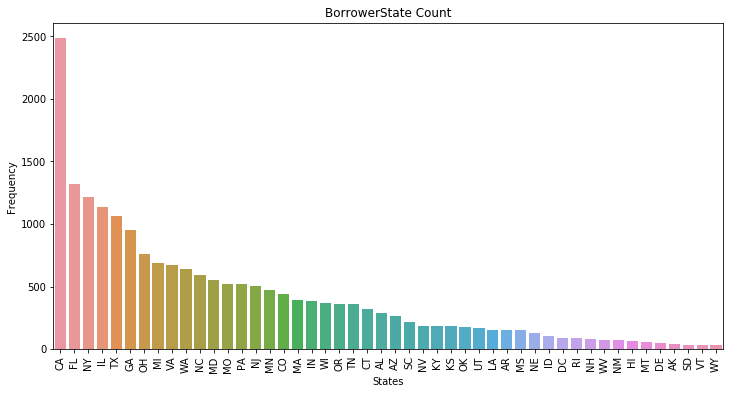

In [18]:
plt.figure(figsize=(12,6))
BorrowerState_count = loan_clean_new['BorrowerState'].value_counts()
sb.barplot(BorrowerState_count.index, BorrowerState_count);
plt.xticks(rotation=90)
plt.title('BorrowerState Count')
plt.xlabel('States')
plt.ylabel('Frequency');


OBSERVATION: From the plot above, it is shown that Califonia (CA) has the highest number of loans, which is twice or a bit more than twice the next highest state FL.


## QUESTION 2:  What are the count of each loan status Category and which category has the highest count?

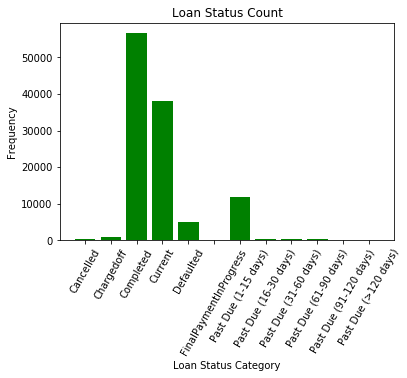

In [19]:
x = loan_clean['LoanStatus'].unique()
y = loan_clean['LoanStatus'].value_counts()
plt.bar(x,y, color ='green');
plt.xticks(rotation=60)
plt.title('Loan Status Count')
plt.xlabel('Loan Status Category')
plt.ylabel('Frequency');


OBSERVATION:  From the chart above, majority of the loan repayment has been completed which has the highest count followed by a significant number of loans are still currently running, few customers have defaulted in loan repayment and a significant number also have their loans past due(1-15days) which means they have exceeded the loan term by 1-15 days and they have not completed repayment of their loans 

## QUESTION 3: What occupation mostly applied for loan?

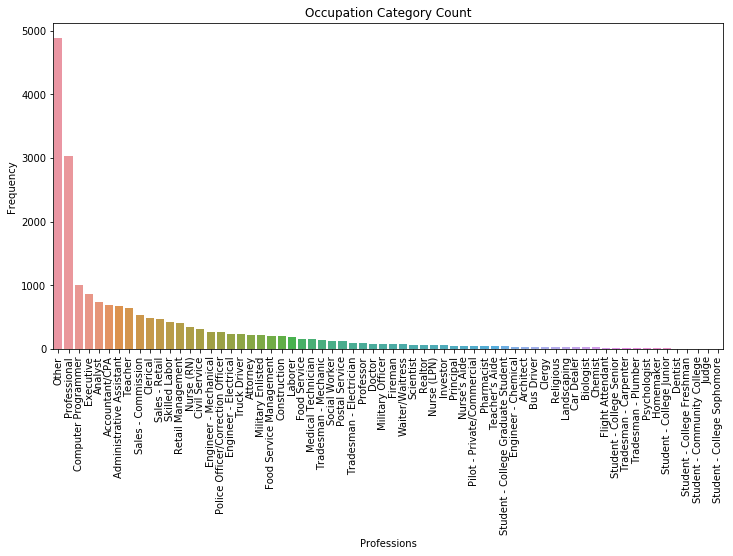

In [20]:
plt.figure(figsize=(12,6))
Occupation_count = loan_clean_new['Occupation'].value_counts()
sb.barplot(Occupation_count.index, Occupation_count);
plt.xticks(rotation=90)
plt.title('Occupation Category Count')
plt.xlabel('Professions')
plt.ylabel('Frequency');


OBSERVATION: It is shown fron the above chart that other professsions or category appllied for loan the most, followed by professionals then the computer programmers. This may appertain to their income range category.

## QUESTION 4: Which of the employement status are most considered for loan?

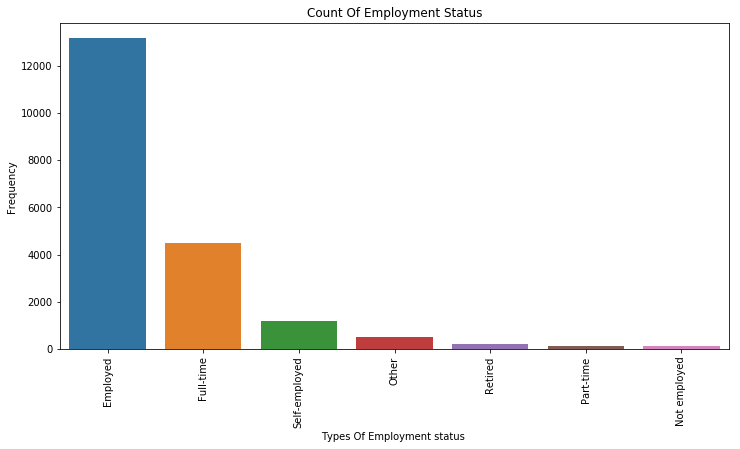

In [21]:
plt.figure(figsize=(12,6))
Employ_status_count = loan_clean_new['EmploymentStatus'].value_counts()
sb.barplot(Employ_status_count.index, Employ_status_count);
plt.xticks(rotation=90)
plt.title('Count Of Employment Status')
plt.xlabel('Types Of Employment status ')
plt.ylabel('Frequency');

OBSERVATION: From the chart above, it is shown that hose employeed are mostly given loan, follwed by the full_time. Those who are not employeed are hardly considered for loan.

## QUESTION 5: Which of the category in income range recieved loan the most?

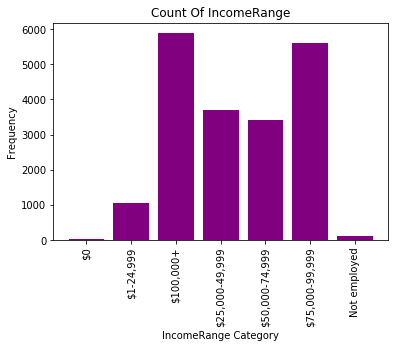

In [22]:
x = loan_clean_new['IncomeRange'].unique()
y = loan_clean_new['IncomeRange'].value_counts()
plt.bar(x,y, color = 'purple');
plt.xticks(rotation=90)
plt.title('Count Of IncomeRange')
plt.xlabel('IncomeRange Category')
plt.ylabel('Frequency');


OBSERVATION:  From the chart above, It can be shown that customers with income range 25,000-49,999 dollars had the highest number of people that was given loan followed by 50,000-74,999 dollars income range category and thirdly, 100,000 dollars income range category.

## QUESTION 6: What is the distribution of the Prosper Principal Outstanding?

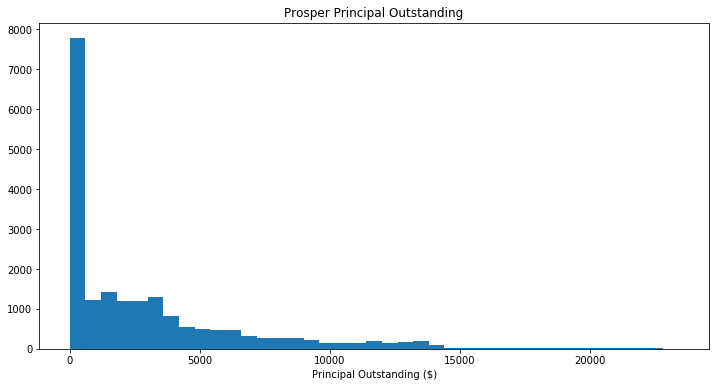

In [23]:
bins = np.arange(0, loan_clean_new['ProsperPrincipalOutstanding'].max()+250, 600)

plt.figure(figsize=[12, 6])
plt.hist(data = loan_clean_new, x = 'ProsperPrincipalOutstanding', bins = bins)
plt.xlabel('Principal Outstanding ($)')
plt.title('Prosper Principal Outstanding')
plt.show()

OBSERVATION:  From the plot, it is shown that it is a unimodal distribution and it is crotched to the right. It first shows the record that no repayment has been made from the principal borrowed. the frquency of the remittance became high as the outstanding approaches 0. It remained on the same level between 500 and 3,000. At higher outstanding amount, the frequency of remittance was lower and as the outstanding decreases the frequency of remittance was high.

## QUESTION 7: What is the proportion of borrowers that are home owners and borrowers that are not home owners

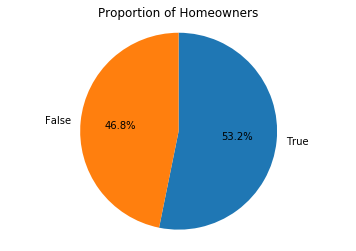

In [24]:
Homeowners_prop = loan_clean_new['IsBorrowerHomeowner'].value_counts()
plt.pie(Homeowners_prop, labels= Homeowners_prop.index, counterclock=False, startangle=90, autopct='%0.1f%%');
plt.axis('equal');
plt.title('Proportion of Homeowners');

Observation:From the chart shown above, borrowers that are Home owners have highest percentage and proportion of 52.8% and borrowers thast are not Home owners have the percetage and proportion of 47.2%.









## QUESTION 8: What is the proportion of borrowers that were currently in a group at the of listing?

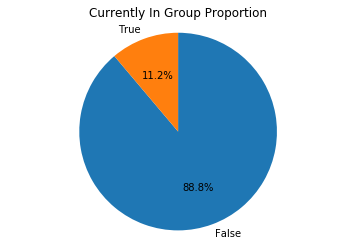

In [25]:
Group_prop = loan_clean['CurrentlyInGroup'].value_counts()
plt.pie(Group_prop, labels= Group_prop.index, counterclock=False, startangle=90, autopct='%0.1f%%');
plt.axis('equal');
plt.title('Currently In Group Proportion');

OBSERVATION: It is shown from the chart above, that 88.8% of borrowers were in a group at the time listing was being created and 11.2% of borrowers were not. 

## QUESTION 9: What is the distribution of the Borrower Rate?

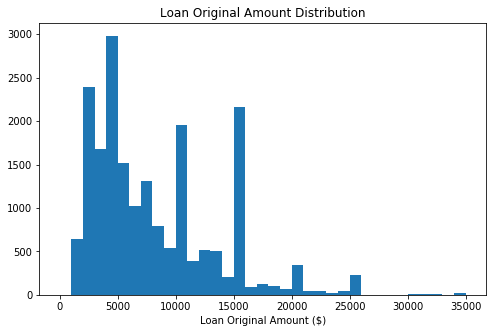

In [26]:
bins = np.arange(0, loan_clean_new['LoanOriginalAmount'].max()+25, 1000)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_clean_new, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distribution')
plt.show()


OBSERVATION: From the chart above, it shown that the frequency distribution of the loan original amount shows that it is a right skewed distribution and it is unimodal.  

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

¶

> The distribution of my variables of interest which are Principal outstanding and loan original amount shows a unimodal distribution that is skewed to the right. There were no unusual points discovered in the distribution and there was no need to perform any transformations.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions in the features I investigated and I performed some WRANGLING operations on the data to tidy it such as removal of columns I wouldn't need for my investigations. The columns were too many and were reduced from 81 columns to 45 columns. Nan values were removed from the datasets and were stored differently as loan_clean_new. Datatypes were changed in two columns Principal borrowed and Principal Outstanding from float to integer.

## Bivariate Exploration

## QUESTION 10:  What is the relationship between the EstimatedLoss and  EstimatedReturn?

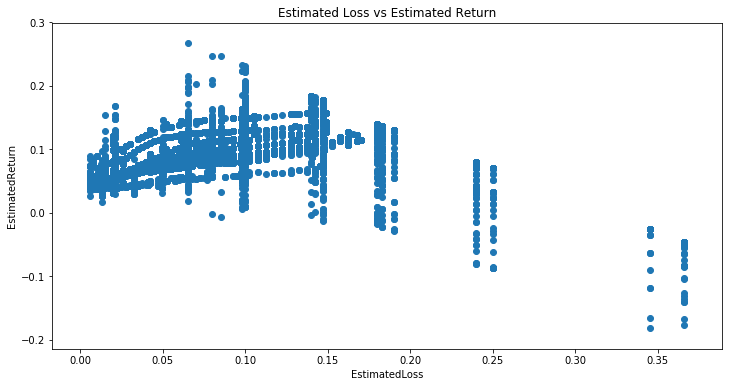

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(data=loan_clean_new, x='EstimatedLoss', y='EstimatedReturn')
plt.title('Estimated Loss vs Estimated Return')
plt.xlabel('EstimatedLoss')
plt.ylabel('EstimatedReturn');


OBSERVATION: From the plot above, It is shown that there is a position relationship between the estimated loss and estimated return, and it has some outliers

## QUESTION 11: What number of inquiries has the highest total number of inquiries

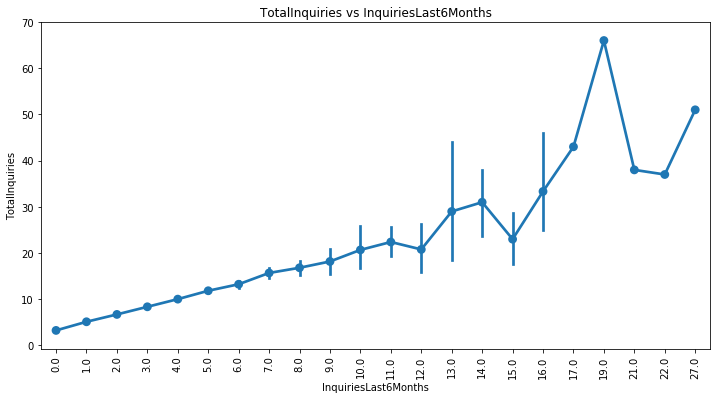

In [28]:
plt.figure(figsize=(12,6))
sb.pointplot(data=loan_clean_new, x='InquiriesLast6Months', y='TotalInquiries');
plt.xticks(rotation=90);
plt.title('TotalInquiries vs InquiriesLast6Months');


OBSERVATION: It is shown from the plot that, 19.0 has the highest inquiries in the last 6months transaction and about 67 has the highest total inquiries. Generally it is shown that the inquiries last 6months and total inquiries increased against one another and along the line only few decreases occured against each other  

## QUESTION 12:  What is the higest rating subject to the loan amount dispensed?

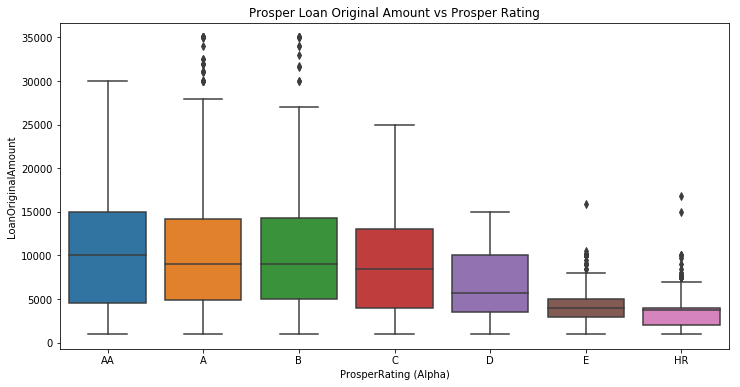

In [37]:
plt.figure(figsize=(12,6))
sb.boxplot(data=loan_clean_new, x='ProsperRating (Alpha)', y='LoanOriginalAmount', order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.title('Prosper Loan Original Amount vs Prosper Rating');

OBSERVATION:  It can be shown from the Prosper rating (Alpha) in the plot above that AA has the highest maximum whisker length followed by rating A and B. HR has the least rating against the loan amount. The plot shown above has been arranged in a chronological order starting with the highest rating AA to the lowest rating HR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is shown from the Prosper rating (Alpha)vs the loan amount in the plot above that AA is the best rating and has the highest maximum whisker length followed by rating A. HR has the least rating against the loan amount. It varies from other features in the dataset as it shows the category rating with respect to the loan amount disbursed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed some interesting relationships between estimated loss and estimated return as well as total inquiries and inquiries in the last 6months as both gave a linear positive relationship when shown on a scatter plot. 

## Multivariate Exploration

## QUESTION 13:  In what way does Loan Amount and Monthly Loan Payment Vary in any two Employment status Category?

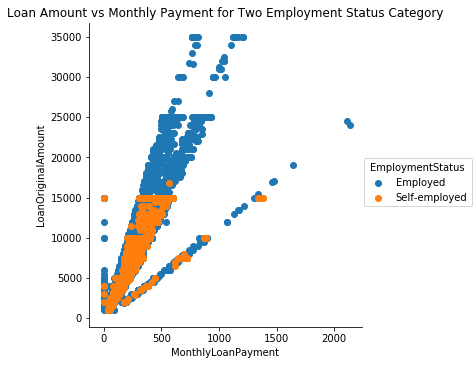

In [30]:
loan_clean_new_sub = loan_clean_new.loc[loan_clean_new['EmploymentStatus'].isin(['Employed', 'Self-employed'])]
g = sb.FacetGrid(data = loan_clean_new_sub, hue = 'EmploymentStatus', size = 5)
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount')
plt.title('Loan Amount vs Monthly Payment for Two Employment Status Category')
g.add_legend();

OBSERVATION:  It is shown from the plot above that there are two color variations as a result of two categories of Employment status which are Employed and Self-employed both of which exhibit linear positive relationships though with Employeed having the highest Loan Amount as well as highest monthly loan payment. More people who are in the Employed category were given loan than in the Self-employed category.

## QUESTION 14:  What is the relationship between Prosperprincipaloutstanding and monthly loan payment subject to income categories and two employment status(Employed and Self-employed)

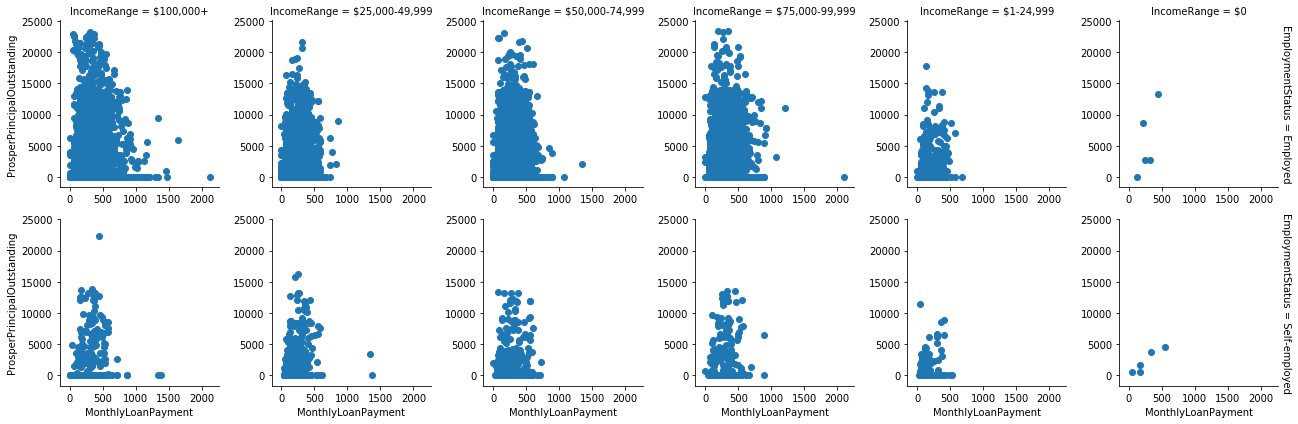

In [31]:
g = sb.FacetGrid(data = loan_clean_new_sub, col = 'IncomeRange', row = 'EmploymentStatus', size = 3.0,
                margin_titles = True)
g.map(plt.scatter, 'MonthlyLoanPayment', 'ProsperPrincipalOutstanding');


> OBSERVATION:  It can be shown from the above plot, that Employed employment status gave more predictions and variations than Self-employed employment status. Therefore, the income category with the highest variations and predictions of prosperprincipaloutstanding against monthly loan payment is 100,000 dollars+..

## QUESTIN 15: 

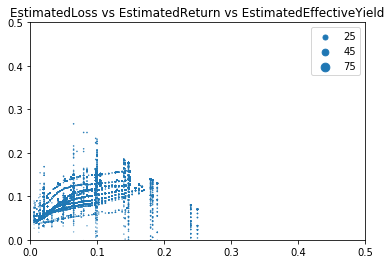

In [32]:
plt.scatter(data = loan_clean_new, x = 'EstimatedLoss', y = 'EstimatedReturn', s = 'LenderYield')

# dummy series for adding legend
sizes = [25, 45, 75]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.title('EstimatedLoss vs EstimatedReturn vs EstimatedEffectiveYield')
plt.legend(legend_obj, sizes);

> OBSERVATION:  This linear positive relationship exists between the three variables namely; estimated loss, estimated return and estimated effective yield. This three numeric variable was depicted in the same plots using different sizes. They have approximately the same size but lender yield has a bigger size than the other two variables.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I was able to derive relationships with Multivariate variables by encoding with size. It resulted to a linear positive relationships amongst variables. Relationships were drawn between two numeric variables and two categorical variables using scatterplot with incomerange in the column and employment status in the row. It resulted to interesting interactions.

### Were there any interesting or surprising interactions between features?

> There were  interesting interactions between features as the Employed employment status had much more variable interactions than the Self-employed employment status. The income category with the highest variations and predictions of prosperprincipalborrowed against monthly loan payment is 100,000+ dollars.



## Conclusions
> This is a Prosper Loan Data with 113,937 rows and 81 columns. it shows a loan facility collected from customers across different career of life. Different categories of occupation includes: skilled labor, excutive, sales-retail, computer programmer, food service sale-commission e.t.c. Preliminary wrangling such as checking the non null values and datatypes of each column was done, descriptive statistics was carried out using the describe function, columns record were reduced by dropping the columns from 81 to 45 columns, nan values were dropped and stored in a new Dataframe and data types were converted from float64 to int64. Univariate, bivariate and Multivariate exploration was carried out and some interesting interactions were observed from the exploration of the Prosper Loan Datasets as shown in the observations of all the visualization carried out.


## Reference

- Oladayo Johnson, Udacity Graduate 2022,
- Link
file:///C:/Users/DAYO%20JONSON/Downloads/Prosper_Loan_Data_Exploration_PartI%20(1).html